In [ ]:
!pip install yfinance

In [ ]:
!pip install pandas_datareader

In [ ]:
#Import Modules
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
MTDL = yf.Ticker('MTDL.jk')

In [ ]:
hist = MTDL.history(start='2016-08-26', end='2024-12-03')

In [ ]:
hist.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-11-25 00:00:00+07:00,640.0,640.0,620.0,620.0,2447600,0.0,0.0
2024-11-26 00:00:00+07:00,620.0,630.0,615.0,615.0,1367900,0.0,0.0
2024-11-28 00:00:00+07:00,615.0,625.0,615.0,615.0,1451200,0.0,0.0
2024-11-29 00:00:00+07:00,615.0,630.0,615.0,615.0,2942800,0.0,0.0
2024-12-02 00:00:00+07:00,615.0,640.0,615.0,620.0,1970400,0.0,0.0


In [ ]:
#Kita ambil hanya kolom harga penutupan
data = hist.filter(['Close'])

In [ ]:
#kita ambil hanya nilainya saja
dataset = data.values

In [ ]:
#kita akan memisahkan data training dengan data testing sebanyak 80 : 20
training_data_len = math.ceil(len(dataset) * .8)

In [ ]:
#scaling
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
train_data = scaled_data[0:training_data_len, :]

In [ ]:
x_train = []
y_train = []

In [ ]:
# time series
# x = n hari sebelum hari ini
# y = data hari ini

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  # check for a bunch of x_train and y _train
  if i <=60:
    print(x_train)
    print()
    print(y_train)
    print()

[array([0.02806737, 0.02806737, 0.02679559, 0.02679559, 0.02679559,
       0.02806737, 0.02806737, 0.02679559, 0.02679559, 0.02679559,
       0.02679559, 0.02679559, 0.02679559, 0.02679559, 0.02679559,
       0.02679559, 0.02679559, 0.02679559, 0.02679559, 0.02679559,
       0.02679559, 0.02679559, 0.02679559, 0.02806737, 0.02806737,
       0.02679559, 0.02679559, 0.02552379, 0.024252  , 0.03188276,
       0.024252  , 0.02298021, 0.02170843, 0.024252  , 0.024252  ,
       0.024252  , 0.02170843, 0.02170843, 0.02170843, 0.02170843,
       0.02552379, 0.02552379, 0.02552379, 0.02679559, 0.02679559,
       0.02170843, 0.024252  , 0.024252  , 0.024252  , 0.024252  ,
       0.02298021, 0.02170843, 0.02170843, 0.01916484, 0.01916484,
       0.0128059 , 0.01662125, 0.01916484, 0.02043663, 0.01916484])]

[0.019164838320676142]



In [ ]:
# mengubah data menjadi format numpy array
X_train, Y_train = np.array(x_train), np.array(y_train)

In [ ]:
# mengubah dimensi data train menjadi 3 dimensi karena LSTM butuh data berdimensi 3
# [number of samples, number of time steps, and number of features]
X_train = np.reshape(X_train, (
    X_train.shape[0],
    X_train.shape[1],
    1
))

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.1))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(tf.keras.layers.GRU(units=50))  #
model.add(Dropout(0.2))
model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.mse, metrics=["accuracy"])

In [ ]:
model.fit(X_train, Y_train, epochs=5, batch_size=5)

Epoch 1/5
317/317 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.0066 - loss: 0.0022
Epoch 2/5
317/317 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.0012 - loss: 0.0024
Epoch 3/5
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.0052 - loss: 0.0020
Epoch 4/5
317/317 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.0034 - loss: 0.0018
Epoch 5/5
317/317 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.0038 - loss: 0.0017


In [ ]:
test_data = scaled_data[training_data_len-60:, :]

In [ ]:
x_test = []
y_test = dataset[training_data_len:, :] #actual values diambil dari dataset

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
#ubah x_test menjadi numpy array
x_test = np.array(x_test)

In [ ]:
#mengubah x test menjadi 3 dimensi
x_test = np.reshape(x_test,
                    (x_test.shape[0],
                     x_test.shape[1],
                     1))

In [ ]:
predictions = model.predict(x_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [ ]:
# mengembalikan lagi ke angka awal (tidak di scaling)
predictions = scaler.inverse_transform(predictions)

In [ ]:
from sklearn.metrics import mean_squared_error as mse

rmse = np.sqrt(mse(y_test, predictions))

In [ ]:
print(rmse)

13.95798916632254


In [ ]:
# membuat dataframe
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

<ipython-input-32-7d682f21330a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


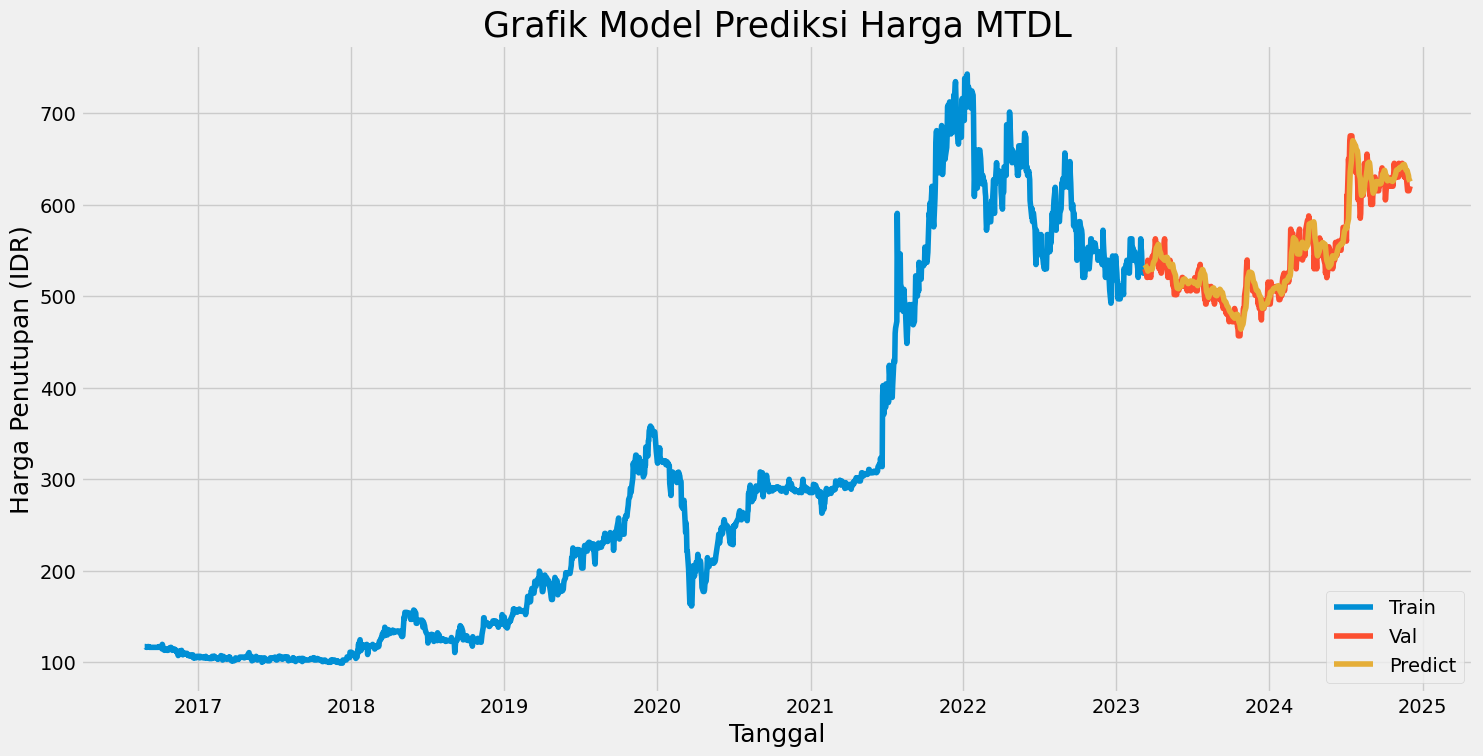

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Grafik Model Prediksi Harga MTDL', fontsize=25)
plt.xlabel('Tanggal',fontsize=18)
plt.ylabel('Harga Penutupan (IDR)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predict'], loc='lower right')
plt.show()

# Remodelling

Gabung data training dan testing tadi jadi data scaled

In [ ]:
x = []
y = []

for i in range(60, len(scaled_data)):
  x.append(scaled_data[i-60:i, 0])
  y.append(scaled_data[i, 0])
  # check for a bunch of x_train and y _train
  if i <=60:
    print(x)
    print()
    print(y)
    print()

# mengubah data menjadi format numpy array
x_train, y_train = np.array(x), np.array(y)

# mengubah dimensi data train menjadi 3 dimensi karena LSTM butuh data berdimensi 3
# [number of samples, number of time steps, and number of features]
x_train = np.reshape(x_train, (
    x_train.shape[0],
    x_train.shape[1],
    1
))

[array([0.02806737, 0.02806737, 0.02679559, 0.02679559, 0.02679559,
       0.02806737, 0.02806737, 0.02679559, 0.02679559, 0.02679559,
       0.02679559, 0.02679559, 0.02679559, 0.02679559, 0.02679559,
       0.02679559, 0.02679559, 0.02679559, 0.02679559, 0.02679559,
       0.02679559, 0.02679559, 0.02679559, 0.02806737, 0.02806737,
       0.02679559, 0.02679559, 0.02552379, 0.024252  , 0.03188276,
       0.024252  , 0.02298021, 0.02170843, 0.024252  , 0.024252  ,
       0.024252  , 0.02170843, 0.02170843, 0.02170843, 0.02170843,
       0.02552379, 0.02552379, 0.02552379, 0.02679559, 0.02679559,
       0.02170843, 0.024252  , 0.024252  , 0.024252  , 0.024252  ,
       0.02298021, 0.02170843, 0.02170843, 0.01916484, 0.01916484,
       0.0128059 , 0.01662125, 0.01916484, 0.02043663, 0.01916484])]

[0.019164838320676142]



In [ ]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.1))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(tf.keras.layers.GRU(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.mse, metrics=["accuracy"])

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=5)

Epoch 1/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.0014 - loss: 0.0026
Epoch 2/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.0019 - loss: 0.0024
Epoch 3/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.0022 - loss: 0.0023
Epoch 4/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.0025 - loss: 0.0023
Epoch 5/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.0013 - loss: 0.0022


In [ ]:
new_df = data.copy()
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
x_test = []
x_test.append(last_60_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test,
                    (x_test.shape[0],
                    x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price_real = scaler.inverse_transform(pred_price)
print(pred_price_real)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step
[[626.8769]]


# Recursive Multi-Step Forecasting

**Definisi:**
Prediksi beberapa hari kedepan dengan data prediksi model hari ini
- Prediksi hari ini akan dijadikan sebagai data konsumsi besok
- Prediksi besok akan dijadikan sebagai data konsumsi lusa
- Dan seterusnya

**Kelemahan:** Karena menggunakan data prediksi sebagai data input untuk model, maka bias prediksi pastinya juga makin besar.